# WEEK 10 GROUP ACTIVITY

Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score.

 ## Importing the libraries needed

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

## 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [73]:
data = pd.read_csv(r'employee.csv')

In [74]:
data.head()
##checking whether the dataset is loaded properly

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [75]:
data.shape
##checking the shape of the dataset

(9, 7)

The given dataset consist of 9 rows and 7 columns

In [76]:
data.info()
##to get the basic information of the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [77]:
data.isna().sum()
##Checking for any null values present in the dataset 

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

Null values are present

In [78]:
data.describe()
##Checking the statistics of columns

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


## 2. Reset the index as "name" as the index.

In [79]:
data=pd.read_csv(r'employee.csv',index_col = 'name')

data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 3. Select rows for specific names Jack Morgan and Josh wills.

In [80]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4. Select data for multiple values "Sales" and “Finance”.

In [81]:
data.loc[data['department'].isin(['Sales','Finance'])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5. Display employee who has more than 700 performance score.

In [82]:
data.loc[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6. Display employee who has more than 500 and less than 700 performance score

In [83]:
data.loc[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7. Check and handle missing values in the dataset

In [84]:
data.isna().sum()
##Checking for any null values present in the dataset 

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

2 missing values are present in age,income and gender columns

**1.filling the values in age column**

<AxesSubplot:xlabel='age', ylabel='Density'>

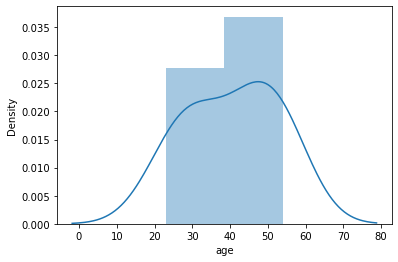

In [85]:
##Here inorder to fill the missing values we need to take the distribution of age data 

sns.distplot(data['age'],kde=True)

here the distribution is a normal distribution so we could use the mean to fill missing values

In [86]:
## filling with the mean value
data['age'] = data['age'].fillna(data['age'].mean())

**2.filling the values in income column**

<AxesSubplot:xlabel='income', ylabel='Density'>

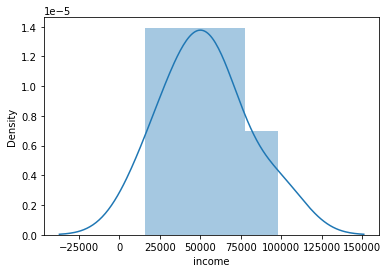

In [87]:
##Here inorder to fill the missing values we need to take the distribution of age data 

sns.distplot(data['income'],kde=True)

In [88]:
## filling with the median value
data['income'] = data['income'].fillna(data['income'].median())

## 3.filling the values in gender column

In [89]:
data['gender'] = data['gender'].fillna(0)

##using this null values get filled as zero

In [90]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,0,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,0,Sales,G3,649
James Authur,54.000000,52000.0,F,Operations,G3,53
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


In [91]:
data.isna().sum()
##checking for null values

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

All the null values are filled

## 8. Check the outliers and handle outliers in performance score using Percentiles.

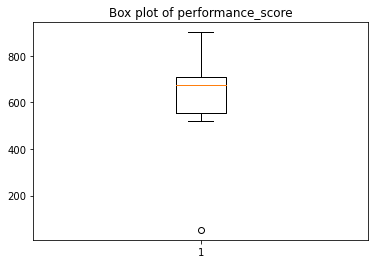

In [92]:
##checking for outliers using boxplot
plt.boxplot(data['performance_score'])
plt.title('Box plot of performance_score')
plt.show()

In [93]:
##To deal with the outliers we are using interquartile range
##here we need to divide the dataset into quartiles Q1,Q2,Q3; using percetile function in numpy

Q1 = np.percentile(data['performance_score'],25,interpolation = 'midpoint')
Q2 = np.percentile(data['performance_score'],50,interpolation = 'midpoint')
Q3 = np.percentile(data['performance_score'],75,interpolation = 'midpoint')

In [94]:
print('Q1:',Q1)
print('Q2:',Q2)
print('Q3:',Q3)

Q1: 556.0
Q2: 674.0
Q3: 711.0


In [95]:
IQR = Q3 - Q1
low_lim = Q1-1.5*IQR
up_lim = Q3 + 1.5*IQR
print('IQR is :',IQR)
print('Lower limit value is:',low_lim)
print('Upper limit value is:',up_lim)

IQR is : 155.0
Lower limit value is: 323.5
Upper limit value is: 943.5


The values less than 323.5 and greater than 943.5 are outliers and can be removed

In [96]:
outlier= data[(data['performance_score'] < low_lim) | (data['performance_score'] > up_lim )]

In [97]:
print('Outliers :',outlier)

Outliers :                age   income gender  department grade  performance_score
name                                                                   
James Authur  54.0  52000.0      F  Operations    G3                 53


In [98]:
outlier.index

Index(['James Authur'], dtype='object', name='name')

In [99]:
data = data.drop('James Authur')
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.000000,52000.0,0,Operations,G3,723
S Kumar,40.428571,16000.0,F,Finance,G0,520
Jack Morgan,32.000000,35000.0,M,Finance,G2,674
Ying Chin,45.000000,65000.0,F,Sales,G3,556
Dheeraj Patel,30.000000,42000.0,F,Operations,G2,711
Satyam Sharma,40.428571,62000.0,0,Sales,G3,649
Josh Wills,54.000000,52000.0,F,Finance,G3,901
Leo Duck,23.000000,98000.0,M,Sales,G4,709


## 9. Check the gender column and do Dummy encoding.

In [100]:
data1=pd.get_dummies(data,columns=['gender'])

In [101]:
data1

,age,income,department,grade,performance_score,gender_0,gender_F,gender_M
name,,,,,,,,
Allen Smith,45.000000,52000.0,Operations,G3,723,1,0,0
S Kumar,40.428571,16000.0,Finance,G0,520,0,1,0
Jack Morgan,32.000000,35000.0,Finance,G2,674,0,0,1
Ying Chin,45.000000,65000.0,Sales,G3,556,0,1,0
Dheeraj Patel,30.000000,42000.0,Operations,G2,711,0,1,0
Satyam Sharma,40.428571,62000.0,Sales,G3,649,1,0,0
Josh Wills,54.000000,52000.0,Finance,G3,901,0,1,0
Leo Duck,23.000000,98000.0,Sales,G4,709,0,0,1


## 10.Do the standard scaling on the feature performance score.

In [103]:
x=data.drop(['age','income','gender','department','grade'],axis=1)

In [104]:
from sklearn import preprocessing
std= preprocessing.StandardScaler()
x=std.fit_transform(x)

x=pd.DataFrame(x)
x.describe()

,0
count,8.000000e+00
mean,4.857226e-17
std,1.069045e+00
min,-1.475872e+00
25%,-5.026938e-01
50%,1.023793e-01
75%,3.094385e-01
max,2.030331e+00
